<a href="https://colab.research.google.com/github/mkousal/MPA-MLF/blob/main/Miniproject/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPA-MLF miniproject

In [1]:
# import all needed libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Normalization
from keras.optimizers import SGD, RMSprop, Adadelta, Ftrl, Nadam, Adagrad, Adamax, Adam
from keras.utils import to_categorical
from keras.regularizers import L1, L2
from keras.backend import clear_session
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2
import pandas as pd

from sklearn import decomposition

# nmatplotlib font setting
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
# mount GDrive for getting csv files wtih data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# data import, split into train and test data

x_train = pd.read_csv('/content/drive/MyDrive/VUT/MPC-EKT/2.semestr/MPA-MLF/project1/x_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/VUT/MPC-EKT/2.semestr/MPA-MLF/project1/y_train.csv')

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

test_data = pd.read_csv('/content/drive/MyDrive/VUT/MPC-EKT/2.semestr/MPA-MLF/project1/x_test.csv')

In [ ]:
x_train

,Unnamed: 0,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,m_power,ph_err,mag_err,evm,Tosc,Tmix
3375,3375,-87.975616,0.077163,-38.662029,-30.080143,1.236009,-0.448295,1.221717,0.960217,2.286889,15.1,22.4
13020,13020,-843.870056,0.094840,-39.833164,-27.702314,1.072974,0.153922,1.081004,0.907891,2.075455,44.6,51.8
4283,4283,-458.366974,0.049915,-45.426483,-27.135962,0.517681,-1.186664,1.041157,0.525864,1.823884,41.7,49.3
7845,7845,-385.062225,-0.011133,-29.899054,-35.864426,-3.664144,-0.786229,1.239591,2.753255,3.431962,12.4,21.1
14664,14664,-780.472839,0.034196,-31.524048,-33.417858,3.031451,-0.872485,1.342455,2.248192,3.243611,11.1,17.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1159,1159,-800.132568,0.077594,-39.051041,-27.943302,1.171211,0.225295,0.970435,1.042862,1.980761,29.7,38.2
7970,7970,-404.741089,0.059844,-32.575058,-29.415905,2.664455,-0.510739,1.157785,2.110270,2.970921,27.3,36.1
13323,13323,-972.087769,0.113631,-39.083942,-27.806093,1.029364,0.043428,1.009927,0.884622,1.971131,48.1,55.4
15177,15177,-506.143402,0.026267,-31.650129,-32.594181,3.207303,-0.810944,1.462669,2.263320,3.386744,2.7,9.6


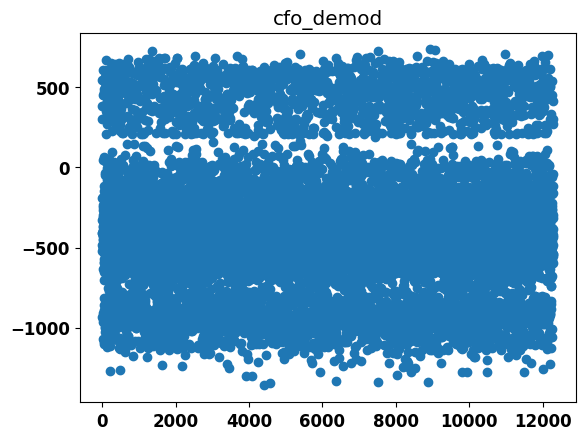

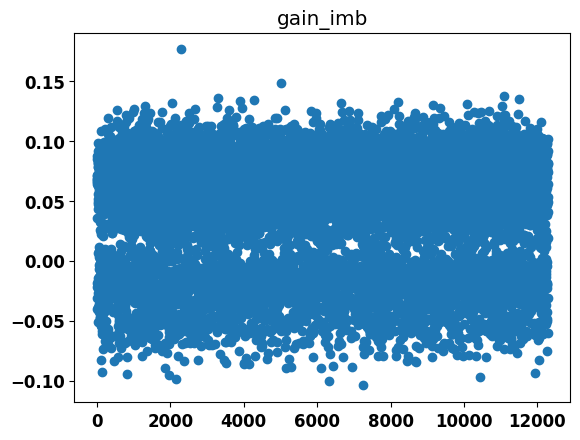

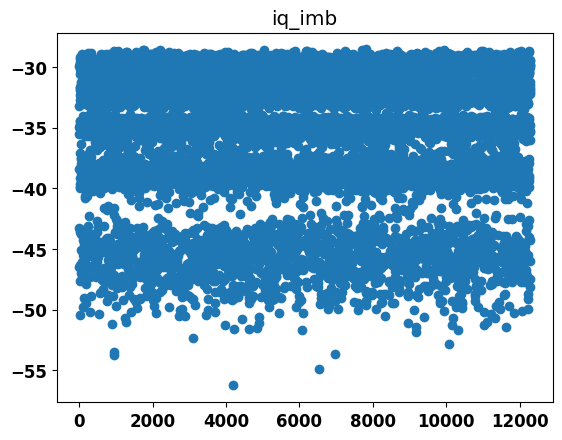

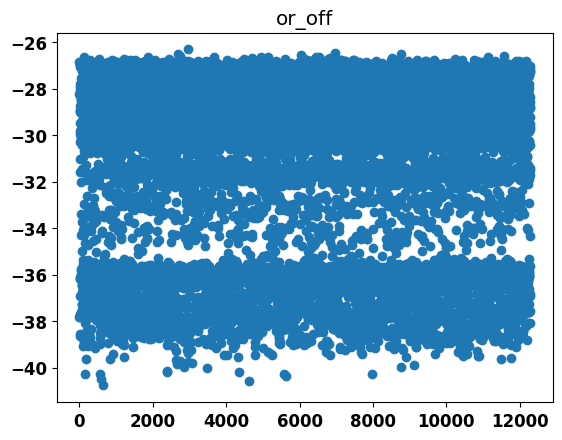

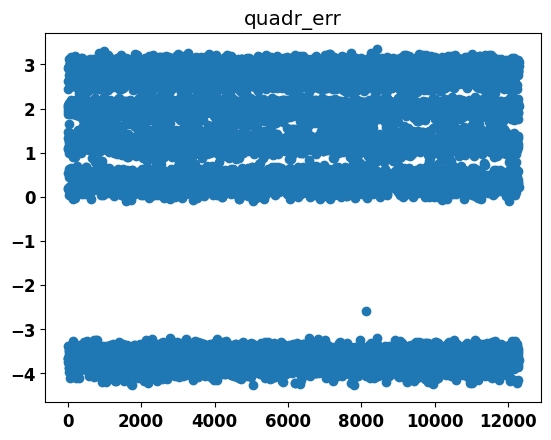

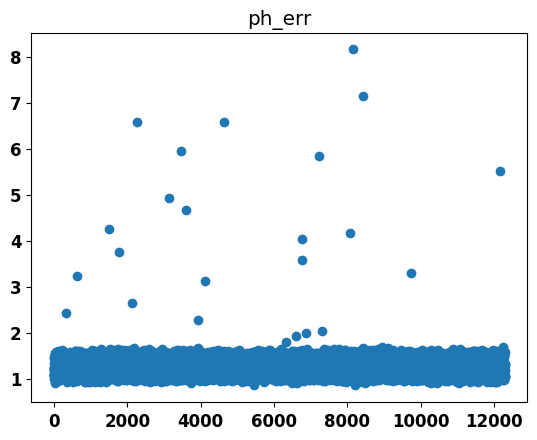

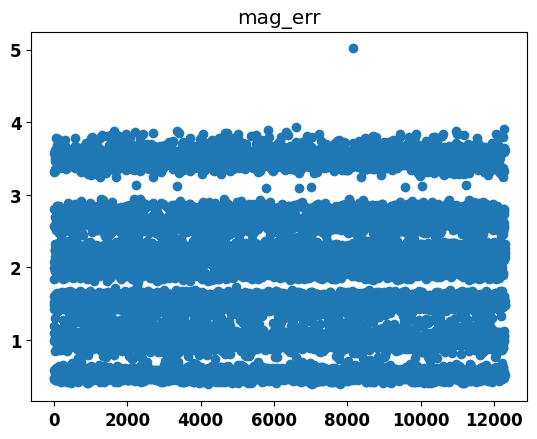

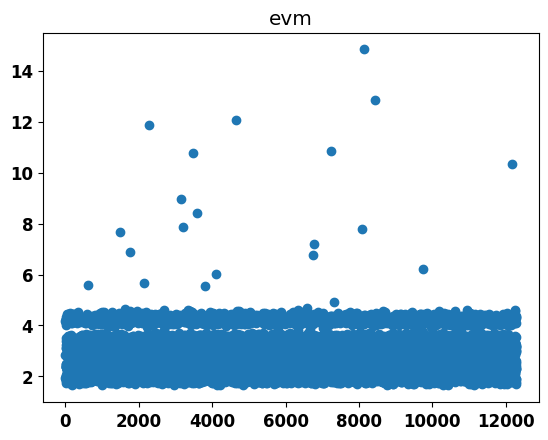

In [11]:
# data examination
plt.figure()
plt.title("cfo_demod")
cfo_demod = x_train.cfo_demod
plt.scatter(range(len(cfo_demod)),cfo_demod)
plt.show()

plt.figure()
plt.title("gain_imb")
gain_imb = x_train.gain_imb
plt.scatter(range(len(gain_imb)), gain_imb)
plt.show()

plt.figure()
plt.title("iq_imb")
iq_imb = x_train.iq_imb
plt.scatter(range(len(iq_imb)),iq_imb)
plt.show()

plt.figure()
plt.title("or_off")
or_off = x_train.or_off
plt.scatter(range(len(or_off)), or_off)
plt.show()

plt.figure()
plt.title("quadr_err")
quadr_err = x_train.quadr_err
plt.scatter(range(len(quadr_err)),quadr_err)
plt.show()

plt.figure()
plt.title("ph_err")
ph_err = x_train.ph_err
plt.scatter(range(len(ph_err)), ph_err)
plt.show()

plt.figure()
plt.title("mag_err")
mag_err = x_train.mag_err
plt.scatter(range(len(mag_err)),mag_err)
plt.show()

plt.figure()
plt.title("evm")
evm = x_train.evm
plt.scatter(range(len(evm)), evm)
plt.show()

In [ ]:
y_train

,id,target
3375,3375,3
13020,13020,7
4283,4283,4
7845,7845,1
14664,14664,6
...,...,...
1159,1159,7
7970,7970,8
13323,13323,7
15177,15177,6


In [38]:
####### 
# scaling of datas, dropping unused features, set one-hot encoding to y_data
#######

# drop unused features
x_train_dropped = x_train
x_test_dropped = x_test
test_data_dropped = test_data
x_test_dropped.head

x_train_dropped.drop(labels='Unnamed: 0', axis=1, inplace=True)
x_train_dropped.drop(labels='m_power', axis=1, inplace=True)
x_train_dropped.drop(labels='Tosc', axis=1, inplace=True)
x_train_dropped.drop(labels='Tmix', axis=1, inplace=True)
# print(x_train_dropped.head)
x_test_dropped.drop(labels='Unnamed: 0', axis=1, inplace=True)
x_test_dropped.drop(labels='m_power', axis=1, inplace=True)
x_test_dropped.drop(labels='Tosc', axis=1, inplace=True)
x_test_dropped.drop(labels='Tmix', axis=1, inplace=True)
# print(x_test_dropped.head)
test_data_dropped.drop(labels='Unnamed: 0', axis=1, inplace=True)
test_data_dropped.drop(labels='m_power', axis=1, inplace=True)
test_data_dropped.drop(labels='Tosc', axis=1, inplace=True)
test_data_dropped.drop(labels='Tmix', axis=1, inplace=True)


x_train_scaled = (x_train_dropped-x_train_dropped.min())/(x_train_dropped.max()-x_train_dropped.min())
# x_train_scaled = (2 * (x_train_dropped-x_train_dropped.min())/(x_train_dropped.max()-x_train_dropped.min())) -1
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train_dropped)
# x_train_scaled = (x_train_dropped - x_train_dropped.mean())/x_train_dropped.std()


y_train_encoded = to_categorical(y_train.target-1, num_classes=8)

x_test_scaled = (x_test_dropped-x_test_dropped.min())/(x_test_dropped.max()-x_test_dropped.min())
# x_test_scaled = (2 * (x_test_dropped-x_test_dropped.min())/(x_test_dropped.max()-x_test_dropped.min())) -1
# scaler2 = StandardScaler()
# x_test_scaled = scaler2.fit_transform(x_test_dropped)
# x_test_scaled = (x_test_dropped - x_test_dropped.mean())/x_test_dropped.min()

y_test_encoded = to_categorical(y_test.target-1, num_classes=8)

test_data_scaled = (test_data_dropped-test_data_dropped.min())/(test_data_dropped.max()-test_data_dropped.min())
# test_data_scaled = (2 * (test_data_dropped-test_data_dropped.min())/(test_data_dropped.max()-test_data_dropped.min())) -1

print(x_train_scaled.head)

pca = decomposition.PCA()
x_train_scaled_pca = pca.fit_transform(x_train_scaled)
x_test_scaled_pca = pca.fit_transform(x_test_scaled)
test_data_scaled_pca = pca.fit_transform(test_data_scaled)


<bound method NDFrame.head of        cfo_demod  gain_imb    iq_imb    or_off  quadr_err    ph_err   mag_err  \
6365    0.611481  0.546656  0.883567  0.749599   0.952033  0.042766  0.187650   
14271   0.633500  0.357603  0.943659  0.347703   0.090304  0.035320  0.232331   
6271    0.503777  0.646551  0.360631  0.947959   0.591674  0.023215  0.010976   
3342    0.542321  0.357674  0.936770  0.316291   0.100633  0.032629  0.222931   
12958   0.634871  0.650999  0.873556  0.776574   0.935886  0.035921  0.170036   
...          ...       ...       ...       ...        ...       ...       ...   
12793   0.751219  0.589123  0.748615  0.880241   0.813637  0.014795  0.107874   
5901    0.501222  0.716175  0.634937  0.722511   0.718562  0.029030  0.063402   
4985    0.234531  0.639435  0.603622  0.890906   0.708906  0.022672  0.052376   
5648    0.426321  0.295353  0.939780  0.339526   0.096421  0.038948  0.213770   
8472    0.571802  0.295179  0.938327  0.328028   0.098595  0.038170  0.219179  

In [119]:
model = Sequential()

# model.add(Flatten(input_shape=(8, 1)))
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dropout(0.6))
# model.add(Dense(64, activation='sigmoid'))
# model.add(Dense(128, activation='tanh'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(512, activation='sigmoid'))
model.add(Dense(8, activation='softmax'))

In [112]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 2,184
Trainable params: 2,184
Non-trainable params: 0
_________________________________________________________________


In [120]:
optimizer = SGD(learning_rate = 0.1)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) # categorical_accuracy

In [121]:
history = model.fit(x_train_scaled, y_train_encoded, epochs=10, batch_size=16, shuffle=False, validation_split=0.2, verbose=1)

Epoch 1/10
615/615 [==============================] - 2s 3ms/step - loss: 1.2609 - accuracy: 0.5271 - val_loss: 0.6332 - val_accuracy: 0.8328
Epoch 2/10
615/615 [==============================] - 2s 4ms/step - loss: 0.6647 - accuracy: 0.7651 - val_loss: 0.3447 - val_accuracy: 0.9675
Epoch 3/10
615/615 [==============================] - 3s 6ms/step - loss: 0.4921 - accuracy: 0.8281 - val_loss: 0.2346 - val_accuracy: 0.9821
Epoch 4/10
615/615 [==============================] - 2s 3ms/step - loss: 0.4006 - accuracy: 0.8606 - val_loss: 0.1769 - val_accuracy: 0.9768
Epoch 5/10
615/615 [==============================] - 2s 3ms/step - loss: 0.3436 - accuracy: 0.8814 - val_loss: 0.1343 - val_accuracy: 0.9833
Epoch 6/10
615/615 [==============================] - 2s 3ms/step - loss: 0.2998 - accuracy: 0.8995 - val_loss: 0.1005 - val_accuracy: 0.9882
Epoch 7/10
615/615 [==============================] - 2s 3ms/step - loss: 0.2765 - accuracy: 0.9036 - val_loss: 0.0957 - val_accuracy: 0.9829
Epoch 

In [126]:
score = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.5708730220794678
Test accuracy: 85.51432490348816 %


In [110]:
clear_session()

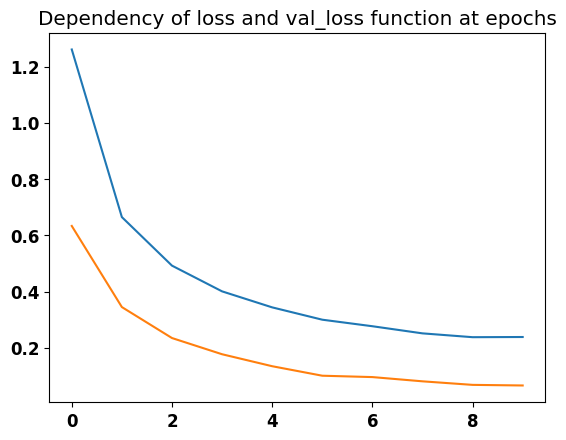

In [124]:
plt.figure()
plt.title("Dependency of loss and val_loss function at epochs")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

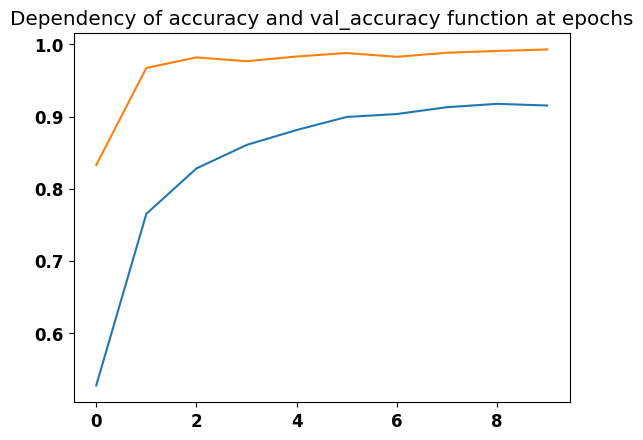

In [125]:
plt.figure()
plt.title("Dependency of accuracy and val_accuracy function at epochs")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [116]:
predictions = model.predict(test_data_scaled)
predictions

120/120 [==============================] - 0s 1ms/step


array([[2.1896918e-07, 6.9689428e-12, 1.3238424e-03, ..., 2.6299499e-12,
        3.9859961e-13, 3.3726299e-04],
       [1.1043853e-06, 6.2972831e-08, 3.3466987e-02, ..., 6.4729773e-03,
        1.9377658e-05, 9.6001929e-01],
       [1.5369559e-07, 1.1194523e-11, 9.2898594e-04, ..., 4.5780402e-12,
        1.1575887e-13, 4.2153546e-04],
       ...,
       [1.7471377e-02, 9.8245865e-01, 1.1591600e-06, ..., 6.8484427e-05,
        1.3904918e-12, 3.0338035e-07],
       [2.9919320e-05, 7.4152823e-10, 9.7284526e-01, ..., 7.6468759e-06,
        4.2320131e-03, 2.2833200e-02],
       [9.8671860e-01, 1.2884033e-02, 3.1780449e-04, ..., 2.0761643e-06,
        1.0057369e-11, 4.8736038e-06]], dtype=float32)

In [117]:
res = pd.DataFrame(predictions, columns=['1','2','3','4','5','6','7','8'])
results = pd.DataFrame(res.idxmax(axis=1), columns=['target'])
results.insert(0, 'id', range(0,3840))
results.columns = ['id', 'target']
results

,id,target
0,0,5
1,1,8
2,2,5
3,3,1
4,4,6
...,...,...
3835,3835,7
3836,3836,1
3837,3837,2
3838,3838,3


In [118]:
from google.colab import files
results[['id', 'target']].to_csv('output.csv', index=False)
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>